# TDL 9.2 Thinking with Deep Learning: Week 9 Part 2
# Deep Learning and Digital Doubles

__Instructor:__ James Evans

__Teaching Assistants & Content Creators/Organisers:__ Bhargav Srinivasa Desikan (Notebook Author), James Evans (Notebook Editor), Likun Cao (Notebook Reviewer)


# Integrating and Aligning Data and Embeddings 

This section will explore methods aligning data and embeddings. At first, we will not be traning deep learning models based on multi-modal data, but rather using different representations and embeddings--which may have been generated within the hidden layers of an effective neural network model--and seeing how we can align or integrate them through simple stacking or more sophisticated alignment (e.g., procrustes). 

## Aligning Diverse Data Types

Another approach is to align concepts across their multiple representations and modes of perception. For example, according to distributional semantics, words acquire their meaning from the company they keep, and the word2vec method uses this as its theoretical motivation.

#### Words as semantic content

In [ ]:
word_vectors["spoon"]

array([-6.07910156e-02, -5.85937500e-02,  2.05078125e-01, -1.02539062e-01,
       -1.97265625e-01, -1.37695312e-01,  2.83203125e-01, -4.67300415e-04,
       -1.87500000e-01, -1.01470947e-03, -2.42187500e-01, -1.69677734e-02,
        2.02148438e-01,  8.34960938e-02, -1.72851562e-01,  1.37695312e-01,
       -2.03125000e-01, -5.98144531e-02, -2.67578125e-01, -2.77343750e-01,
        2.44140625e-01,  2.41210938e-01,  4.31640625e-01,  1.04370117e-02,
        1.34765625e-01, -1.86523438e-01, -1.05957031e-01,  2.50000000e-01,
       -1.73828125e-01,  1.27929688e-01, -8.39843750e-02,  3.68652344e-02,
        2.52685547e-02, -1.28906250e-01,  9.37500000e-02,  2.14843750e-01,
        2.07031250e-01,  2.53906250e-01, -5.95703125e-02,  1.45507812e-01,
        9.22851562e-02,  3.08227539e-03,  4.33593750e-01, -1.18164062e-01,
        3.90625000e-01, -3.78417969e-02, -1.33789062e-01,  1.19628906e-01,
        4.96093750e-01,  6.29882812e-02, -2.92968750e-01, -7.41577148e-03,
       -1.26953125e-01, -

In [ ]:
word_vectors["spatula"]

array([-0.19140625, -0.04296875,  0.27539062,  0.00488281, -0.3203125 ,
        0.08203125,  0.05566406, -0.03613281, -0.31445312,  0.10693359,
       -0.359375  ,  0.29882812,  0.02331543,  0.05517578, -0.140625  ,
        0.1953125 , -0.23632812, -0.22167969, -0.06542969, -0.3359375 ,
        0.25195312, -0.09326172,  0.54296875,  0.11328125, -0.28710938,
       -0.12011719, -0.11181641,  0.20996094, -0.33203125,  0.30273438,
       -0.3359375 , -0.12255859,  0.12890625, -0.28515625, -0.04223633,
        0.25585938,  0.3203125 ,  0.07177734,  0.19042969, -0.01379395,
        0.16992188, -0.22460938,  0.5078125 ,  0.08398438, -0.07519531,
       -0.06396484,  0.05371094,  0.34570312,  0.46289062, -0.16699219,
       -0.30664062,  0.15234375, -0.09765625, -0.26171875, -0.14160156,
        0.2265625 ,  0.49609375, -0.10791016, -0.08447266,  0.234375  ,
        0.04931641, -0.07128906,  0.05273438, -0.11914062,  0.09814453,
        0.11181641, -0.13574219, -0.46875   ,  0.26171875,  0.12

#### Words as Images and Color

Words have meaning associated to them, and this meaning is formed in many ways. The previous method we saw, word2vec, is based on the notion of "distributional semantics", which means that words get their meaning based on how they are distributed, i.e what kind of words appear around each other. Words like spoon appear around words like spatula and ladle, and maybe lie in a "semantic kitchen", of sorts. But words don't just get their meaning through other words, they also get their meaning through the embodied aspects of human experience, such as vision or sound. 

Work in multi-modal theories of cognition and joint embeddings allow us to represent words using mulitple data sources. We've seen how the package [comp-syn](https://github.com/comp-syn/comp-syn/) lets us load both average images and color vectors for words. Let's now look at some representations of spoon, measured in different notions of color. 

To run the colorgram lines of code, download the spoon, soap, spatula and plunger colorgram from this [Google Drive Folder](https://drive.google.com/drive/folders/1rph83P4sWvLTfsnq5TbaISLzD5cmlXF7?usp=sharing) (an average word representation by aggregating images). Once you download the colorgrams you wish to inspect, you must create a folder titled "colorgrams", and upload your image there.

Here, the colorgram serves as an **average image representation of a word**, where it can visually serve as the aggregate representation a word in a dataset or image search. That's why the spoon and spatula colorgrams have that look to them, and this average image is what we use to extract color and lightness information from. We have already seen what these dense RGB and $J_zA_zB_z$ vectors function like in our initial experiments on using distance metrics on them. In fact, comparing between the same concept (here, words) in different semantic spaces and studying their differences is a form of aligning data representations.

In the following code we will more explicity look at these representations along with the visual aid of the colorgram.

In [ ]:
disk_vectors.load_colorgram("spoon")

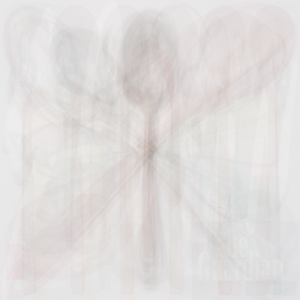

In [ ]:
disk_vectors.vectors["spoon"].colorgram

In [ ]:
disk_vectors.vectors["spoon"].rgb_dist

[3.9738240445479745e-08,
 1.2427330195609368e-09,
 6.615186550505544e-11,
 7.200046236615882e-10,
 6.0791634523004805e-09,
 3.6344928504957475e-09,
 6.0914932165356215e-09,
 4.248967558145478e-07]

In [ ]:
disk_vectors.vectors["spoon"].jzazbz_dist

[1.5443596654454392,
 110.44117960225408,
 0.09030894441112076,
 23.274409875341043,
 0.6444088441605241,
 649.3077159017771,
 7.558348899594023,
 48.892767068044215]

Similarly, the other words we used, spatula, plunger and soap, have corresponding RGB and 𝐽𝑧𝐴𝑧𝐵𝑧  dense representations. Let's have a quick peak at the last 3 colorgrams.

In [ ]:
disk_vectors.load_colorgram("spatula")

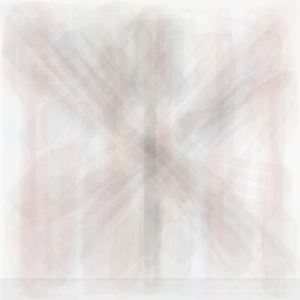

In [ ]:
disk_vectors.vectors["spatula"].colorgram

In [ ]:
disk_vectors.load_colorgram("soap")

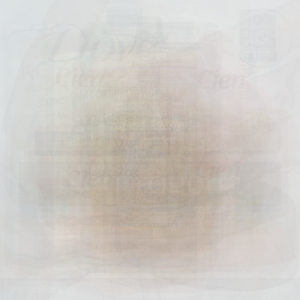

In [ ]:
disk_vectors.vectors["soap"].colorgram

In [ ]:
disk_vectors.load_colorgram("plunger")

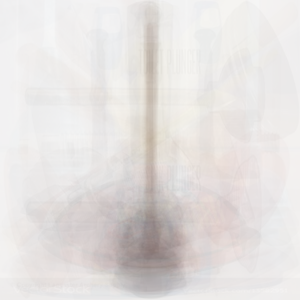

In [ ]:
disk_vectors.vectors["plunger"].colorgram

Visualising these average images helps us understand what is being condensed in the vectors we have access to. Let's now go a step further.

## Words as seen as images by a CNN

So in the above few cells we see an average image, and average color distributions. This tells us the shape and color information associated with the word. We can use this average image for other purposes, such as creating an image embedding of the colorgram. So we are going from

word -> average image of word -> CNN embedding of this image.

Such a representation may be useful in accessing multi-modal insights into words and texts.

In [ ]:
!pip install img2vec_pytorch

  Created wheel for img2vec-pytorch: filename=img2vec_pytorch-0.2.5-cp37-none-any.whl size=4346 sha256=ce9e274c8e3c9858831fe1e434f5ebacc0f35784dd13211da05b092ae2f3abf3
  Stored in directory: /root/.cache/pip/wheels/90/46/f0/37ae7f8a0800160b29f29b728b7d3216c44135b733587bfddb
Successfully built img2vec-pytorch


In [ ]:
from img2vec_pytorch import Img2Vec

In [ ]:
img2vec = Img2Vec()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [ ]:
avg_spoon = disk_vectors.vectors["spoon"].colorgram

In [ ]:
spoon_img_vec = img2vec.get_vec(avg_spoon)

In [ ]:
len(spoon_img_vec)

512

In [ ]:
spoon_img_vec[0:100]

array([5.1462924e-01, 1.3736132e-01, 9.6845120e-02, 2.4486444e+00,
       3.6888501e-01, 2.1258812e+00, 6.9868207e-02, 2.4507231e-01,
       2.9618044e+00, 5.5230546e-01, 5.1986136e-02, 6.9943279e-02,
       6.9794342e-02, 8.6399609e-01, 9.5243055e-01, 7.3033321e-01,
       0.0000000e+00, 7.8759611e-01, 8.6385405e-01, 1.4490935e-01,
       2.4032950e-02, 5.6353760e-01, 6.5943444e-01, 9.4776899e-03,
       1.2000121e-01, 3.8883612e-02, 2.1603763e-01, 8.7112606e-01,
       2.3017031e-01, 9.5547813e-01, 1.0891424e+00, 2.4368379e+00,
       9.2646974e-01, 6.0900545e-01, 2.8053656e-01, 7.6135224e-01,
       2.6861189e-02, 1.3456893e-01, 2.1497540e+00, 5.4774117e-01,
       2.5113657e+00, 3.0526653e-01, 6.4136595e-02, 6.5835440e-01,
       1.0762157e+00, 3.0505830e-01, 4.4826981e-01, 7.3063739e-02,
       1.1791687e+00, 1.5055436e-01, 1.0534635e+00, 2.4996020e-01,
       8.2298195e-01, 8.4364347e-02, 1.3348547e+00, 0.0000000e+00,
       2.9481509e-01, 2.7706616e+00, 1.3263461e-01, 8.8681990e

So what is this 512 dimensional vector? It is the internal representation which a image classification CNN makes before making a class prediction (i.e is it a cat, spoon, car, etc). So we have in this vector some notion of the properties of an image which allow it to be easily classified into an object or category. 

Let us create representations of this for our words as well and try some distance measures.

In [ ]:
avg_soap = disk_vectors.vectors["soap"].colorgram
soap_img_vec = img2vec.get_vec(avg_soap)

In [ ]:
avg_plunger = disk_vectors.vectors["plunger"].colorgram
plunger_img_vec = img2vec.get_vec(avg_plunger)

In [ ]:
avg_spatula = disk_vectors.vectors["spatula"].colorgram
spatula_img_vec = img2vec.get_vec(avg_spatula)

In [ ]:
word_image_cnn_vecs = {"spoon_cnn":spoon_img_vec, "plunger_cnn":plunger_img_vec, "spatula_cnn":spatula_img_vec, "soap_cnn":soap_img_vec}

Ok, let's do a brief re-cap. We have 3 different ways of representing these 4 words. Word embeddings (word2vec), Color embeddings (via avg of 100 images of that word using 𝐽𝑧𝐴𝑧𝐵𝑧), Image embedding (via avg of 100 images of that word using a CNN). Each of these embeddings capture a different aspect of the semantics of a word.

Let us see, once more, how standard distance measures explore between these representations. We have already seen these for word and color, but we will do them again to contrast with all 3 forms.


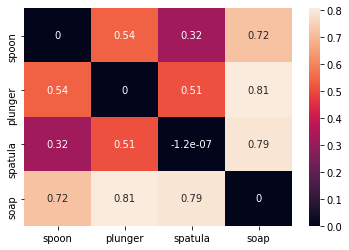

In [ ]:
heatplot(word_vectors, word_vectors, cosine_distance)

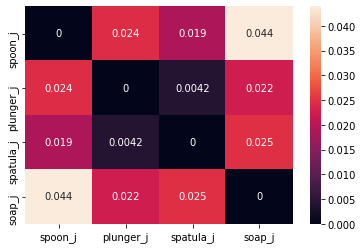

In [ ]:
heatplot(jzazbz_vectors, jzazbz_vectors, jensen_shannon)

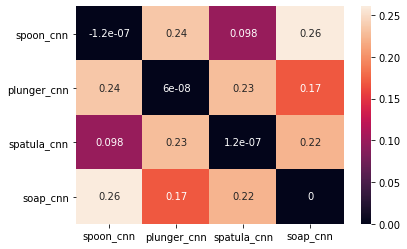

In [ ]:
heatplot(word_image_cnn_vecs, word_image_cnn_vecs, cosine_distance)

It is interesting to see that the spatula and the spoon are similar in all of these spaces. This means that there is a strong alignment in both the semantic and visual content. In other spaces, this is different - for example, the spoon and plunger are far away in a word embedding space (intuitively this matches up), but similar in image spaces - which makes sense in terms of the average image being created, where the images of plumbers and spoons have similar color distributions and shape. Here, we can think of the CNN extracting shape similarities - identifying the shape in local structures is one of the benefits of CNNs for image analysis. 

So we've seen here an aligning which is conceptual - we are creating representations for the same object / concept ("spoon"), using various approaches and aligning them by concept or shape or color. We can then conduct analysis in multiple ways. For example, we may want to cluster all of our collections of word vectors to see how different domains cluster in different ways. What does shape or color bring together that distributional semantics cannot? Another way we can conduct analysis using multiple representations is using them to explore a concept, such as abstract or concrete concepts, or literal or metaphors. The work *comp-syn: Perceptually Grounded Word Embeddings with Color* ([Srinivasa Desikan et al, 2020](https://www.aclweb.org/anthology/2020.coling-main.154/)) explores these concepts using these embeddings. 

## Aligning Similar Data Types Data After Embedding

Aligning similar data types is possible in situations where there are natural oppurtunities of alignment - two examples we will explore in this section are word embedding alignment across time, and word embedding alignment across languages. Note that in this case, we are using only word embeddings, though in principle these alignment methods can extend to situations when the same objects (here they are words) appear in two different settings (here they are times/languages). 



### Cross Temporal Alignment

Below is code that aligns the dimensions of multiple embeddings arrayed over time or some other dimension and allow identification of semantic chanage as the word vectors change their loadings for focal words. This code comes from the approach piloted at Stanford by William Hamilton, Daniel Jurafsky and Jure Lescovec [here](https://arxiv.org/pdf/1605.09096.pdf). 

In this case we are training the models ourselves instead of using a pre-trained model, so this might take some time.

In [ ]:
!pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


In [ ]:
import lucem_illud

In [ ]:
import gensim

In [ ]:
import pandas

In [ ]:
import copy

In [ ]:
import sklearn

In [ ]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In order to explore this, let's get some data that follows a time trend. We'll look at conference proceedings from the American Society for Clinical Oncologists. You can download the data [here](https://drive.google.com/file/d/1R9EiThdJQ3vY84xcoPJGUBeqvemu_o8L/view?usp=sharing).

In [ ]:
ascoDF = pandas.read_csv("/content/ASCO_abstracts.csv", index_col=0)

In [ ]:
ascoDF['tokenized_sents'] = ascoDF['Body'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
ascoDF['normalized_sents'] = ascoDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [ ]:
def compareModels(df, category, sort = True):
    """If you are using time as your category sorting is important"""
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF['normalized_sents'].sum())
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [ ]:
rawEmbeddings, comparedEmbeddings = compareModels(ascoDF, 'Year')

This is the key to our aligning - the smart procrustes align method here is the one doing the aligning, and we are adding the alligned embeddings to the dictionary. 

We need to compare them across all permutions so we will define another function to help, we will be using 1 - cosine similarity as that gives a more intitive range of 0-2 with low values meaning little change and high meaning lots of change.

In [ ]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(embeddingsDict[cat][0][word].reshape(1, -1),
                                                                             embed[word].reshape(1, -1))[0,0]))
    return pandas.DataFrame(dists, index = cats)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn

We now check certain words and see their movement in time along these abstracts.

In [ ]:
targetWord = 'breast'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
targetWord = 'combination'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(embeddingsDict[cats[0]][0][word].reshape(1, -1), embed[word].reshape(1, -1))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)
    

In [ ]:
wordDivergences = findMostDivergent(comparedEmbeddings)

In [ ]:
wordDivergences[:20]

In [ ]:
wordDivergences[-20:]

In [ ]:
targetWord = wordDivergences[2][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
targetWord = wordDivergences[-1][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

We've seen here from a small, research based corpus how it is still able to capture some notion of semantic drift. The word cell has moved among the most and the word view has moved the least. We recommend trying similar analysis on different datasets to see how words change their meaning over time based on the company they keep. 

### Cross lingual alignment

While in the previous example we saw how we can use a time-stamped textual corpus to create embe"ddings and then compare between them, in the following example we use pre-trained embeddings for different languages and align them using some powerful packages built for just doing that.

Here, we will use Fast Text word embeddings downloaded from their [documentation website](https://fasttext.cc/), for Spanish and French embeddings. You must download these embeddings and upload them to be able to do this part of the exercise. Note that these files are kind of large! If it doesn't work, restart your session, clear your uploads and try this section again.

We then perform an SVD and orthogonal transformation on the data to rotate and reflect it so that it is best aligned. 
The code is adapted from:
https://github.com/babylonhealth/fastText_multilingual

In [ ]:
import io

In [ ]:
from fasttext import FastVector

In [ ]:
fr_dictionary = FastVector(vector_file='/content/wiki.fr.vec')


In [ ]:
es_dictionary = FastVector(vector_file='/content/wiki.es.vec')

In [ ]:
fr_vector = fr_dictionary["chat"]
es_vector = es_dictionary["gata"]

In [ ]:
print(FastVector.cosine_similarity(fr_vector, es_vector))

In [ ]:
# from https://stackoverflow.com/questions/21030391/how-to-normalize-array-numpy
def normalized(a, axis=-1, order=2):
    """Utility function to normalize the rows of a numpy array."""
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

def make_training_matrices(source_dictionary, target_dictionary, bilingual_dictionary):
    """
    Source and target dictionaries are the FastVector objects of
    source/target languages. bilingual_dictionary is a list of 
    translation pair tuples [(source_word, target_word), ...].
    """
    source_matrix = []
    target_matrix = []

    for (source, target) in bilingual_dictionary:
        if source in source_dictionary and target in target_dictionary:
            source_matrix.append(source_dictionary[source])
            target_matrix.append(target_dictionary[target])

    # return training matrices
    return np.array(source_matrix), np.array(target_matrix)

def learn_transformation(source_matrix, target_matrix, normalize_vectors=True):
    """
    Source and target matrices are numpy arrays, shape
    (dictionary_length, embedding_dimension). These contain paired
    word vectors from the bilingual dictionary.
    """
    # optionally normalize the training vectors
    if normalize_vectors:
        source_matrix = normalized(source_matrix)
        target_matrix = normalized(target_matrix)

    # perform the SVD
    product = np.matmul(source_matrix.transpose(), target_matrix)
    U, s, V = np.linalg.svd(product)

    # return orthogonal transformation which aligns source language to the target
    return np.matmul(U, V)

To align the two word embeddings, we must try and find some common words with similar meanings. Lets try this by simply going through the common dictionaries.

In [ ]:
es_words = set(es_dictionary.word2id.keys())
fr_words = set(fr_dictionary.word2id.keys())
overlap = list(es_words & fr_words)
bilingual_dictionary = [(entry, entry) for entry in overlap]

In [ ]:
len(bilingual_dictionary)

In [ ]:
# form the training matrices
source_matrix, target_matrix = make_training_matrices(fr_dictionary, es_dictionary, bilingual_dictionary)

In [ ]:
# learn and apply the transformation
transform = learn_transformation(source_matrix, target_matrix)
fr_dictionary.apply_transform(transform)

In [ ]:
fr_vector = fr_dictionary["chat"]
es_vector = es_dictionary["gata"]
print(FastVector.cosine_similarity(fr_vector, es_vector))

Here, we see just that by picking up words which are spelled the same, we have done a decent job in aligning the two spaces - the Spanish word for cat and French word for cat are closer than they were in the previously unaligned space. Try using an actual Spanish - French dictionary next time and see how well the embeddings end up aligning!


### FastText Aligned Embeddings and Vectors

The FastText website has an incredible resource, outside of the rich documentation and examples - pre-trained word vectors for 157 different languages! This is great because it allows for comparisons between languages, and an opportunity for us to search for structural similarities across languages. One of the ways we can do this is by aligning embeddings, similar to what we did for the diachronic temporal embeddings. We already saw code for aligning FastText embeddings using an unsupervised method (dictionary), and in the code below we will exploring embeddings that are already aligned. You can find code to perform the alignment in an [unsupervised](https://github.com/facebookresearch/fastText/blob/master/alignment/unsup_align.py) way, as well as [supervised](https://github.com/facebookresearch/fastText/blob/master/alignment/align.py). (Joulin et al, 2018)

Remember to first download the two files!

#### Loading word embeddings

In [ ]:
import io
import numpy as np

In [ ]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [ ]:
src_path = '/content/vectors-en.txt'
tgt_path = '/content/vectors-es.txt'
nmax = 50000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)

#### Get nearest neighbors

In [ ]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [ ]:
# printing nearest neighbors in the source space
src_word = 'cat'
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "cat":
1.0000 - cat
0.7322 - cats
0.6453 - kitten
0.6381 - dog
0.6218 - kittens


In [ ]:
# printing nearest neighbors in the target space
src_word = 'cat'
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

Nearest neighbors of "cat":
0.6201 - gato
0.5380 - perro
0.4922 - gorila
0.4809 - mapache
0.4751 - conejo


#### Visualize multilingual embeddings

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)  # TSNE(n_components=2, n_iter=3000, verbose=2)
pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

Variance explained: 0.07


In [ ]:
import matplotlib.pyplot as plt


def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
    for tw in tgt_words:
        Y.append(tgt_emb[tgt_word2id[tw]])
        word_labels.append(tw)

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.show()

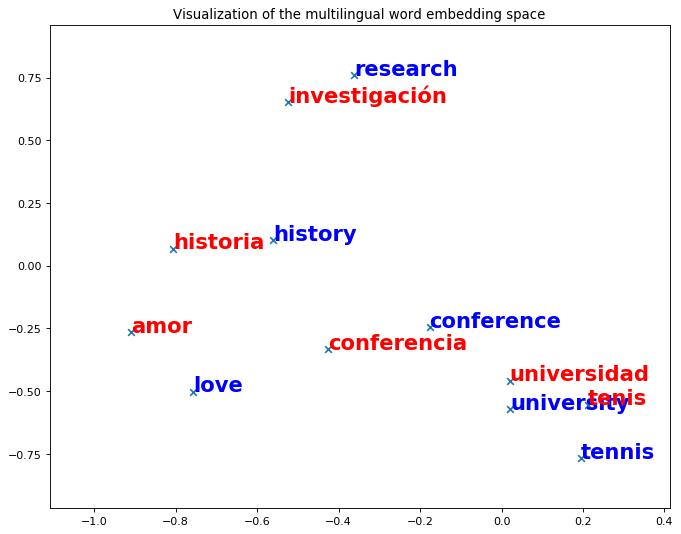

In [ ]:
# get 5 random input words
src_words = ['university', 'love', 'history', 'tennis', 'research', 'conference']
tgt_words = ['universidad', 'amor', 'historia', u'tenis',  u'investigación', 'conferencia']

# assert words in dictionaries
for sw in src_words:
    assert sw in src_word2id, '"%s" not in source dictionary' % sw
for tw in tgt_words:
    assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)

## Wikipedia Multi Modal Data Analysis

In this notebook we will look at what a multi-modal analysis of social and online objects might look like!'

We will start by looking at some wikipedia data - most pages have text, quite a few have images, and since they're linked to each other you can create a network of pages. Some pages have audio too!

In this notebook we will be using the wikipedia data found on [Kaggle](https://www.kaggle.com/jacksoncrow/extended-wikipedia-multimodal-dataset), scraped using [pywikibot](https://github.com/OlehOnyshchak/pyWikiMM). For the sake of demonstrations, I downloaded 4 wikipedia json files from that link - 

1) 1960 South Vietnamese Coup Attempt

2) 1962 South Vietnamese Independence Palace bombing

3) 1880 Democratic National Convention

4) 1880 Republican National Convention


The data we downloaded contains the raw text, as well as a link to images and their features, already extracted using a CNN, similar to the exercises we saw. Let us load these files and see what they look like.

In [ ]:
import json

In [ ]:
import lucem_illud
import spacy

In [ ]:
with open('../data/wiki/text_0.json') as f:
    text_0 = json.loads(json.load(f))

In [ ]:
text_0.keys()

dict_keys(['title', 'id', 'url', 'wikitext', 'html'])

In [ ]:
text_0['wikitext'][0:1000]

"{{pp-move-indef}}\n{{Infobox military conflict\n|conflict=1960 South Vietnamese coup attempt\n|image=Ngo Dinh Diem - Thumbnail - ARC 542189.png\n|image_size  = 300px\n|alt=A portrait of a middle-aged man, looking to the left in a half-portrait/profile. He has chubby cheeks, parts his hair to the side and wears a suit and tie.\n|caption=President Ngô Đình Diệm of South Vietnam\n|partof=\n|date=November 11, 1960\n|place=[[Ho Chi Minh City|Saigon]], [[South Vietnam]]\n|result=[[Coup d'état|Coup]] attempt defeated\n\n|combatant1=[[Army of the Republic of Vietnam|ARVN]] rebels\n|combatant2={{flagicon|South Vietnam}} [[Army of the Republic of Vietnam|ARVN]] loyalists\n|commander1=[[Vương Văn Đông]]<br />[[Nguyễn Chánh Thi]]\n|commander2=[[Ngô Đình Diệm]]<br />[[Nguyễn Văn Thiệu]]<br />[[Trần Thiện Khiêm]]\n|strength1=One armoured regiment, one marine unit, and three paratrooper battalions\n|strength2=[[5th Division (South Vietnam)|5th Division]] and [[7th Division (South Vietnam)|7th Divisi

In [ ]:
with open('../data/wiki/text_1.json') as f:
    text_1 = json.loads(json.load(f))

In [ ]:
with open('../data/wiki/text_2.json') as f:
    text_2 = json.loads(json.load(f))

In [ ]:
with open('../data/wiki/text_3.json') as f:
    text_3 = json.loads(json.load(f))

In [ ]:
nlp = spacy.load("en")

Now that we've loaded the text, we can begin to vectorise. The following methods help you create either avg word2vec or doc2vec vectors.

In [ ]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0 and not token.is_stop and not token.like_num:
            if '|' not in token.text and '=' not in token.text and '.' not in token.text:
                tokenized.append(token.lemma_.lower())
    return tokenized

In [ ]:
tokenized_0 = word_tokenize(text_0['wikitext'])

In [ ]:
tokenized_1 = word_tokenize(text_1['wikitext'])

In [ ]:
tokenized_2 = word_tokenize(text_2['wikitext'])

In [ ]:
tokenized_3 = word_tokenize(text_3['wikitext'])

In [ ]:
def create_vector(text, model, model_type=None):
    if model_type == "word2vec":
        vectors = []
        for word in text:
            try:
                vectors.append(model.wv[word])
            except KeyError:
                pass
        if len(vectors) > 0:
            return np.mean(vectors, axis=0)
    if model_type == "doc2vec":
        vector = model.infer_vector(text)
        return vector

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate([tokenized_0, tokenized_1, tokenized_2, tokenized_3])]

In [ ]:
d2vmodel = Doc2Vec(documents, vector_size=50)

In [ ]:
model_address = "data/" 

In [ ]:
w2v_model = gensim.models.KeyedVectors.load_word2vec_format(model_address, binary=True)

In [ ]:
create_vector(tokenized_0, w2vmodel, model_type="word2vec")

In [ ]:
create_vector(tokenized_0, d2vmodel, model_type="doc2vec")

array([-0.47521707, -0.6569927 , -0.03321923,  1.390251  ,  3.1851172 ,
       -2.3046446 ,  0.7811589 ,  2.6919131 ,  0.12278743,  4.8917794 ,
       -2.1079886 , -0.7931807 ,  0.6441535 ,  1.2792832 ,  0.72818583,
       -0.95999724,  1.4883771 ,  3.074919  , -0.87856305, -2.6820378 ,
       -0.19215181, -2.5349438 , -1.6373653 ,  4.462885  ,  0.22386754,
       -4.3792377 ,  0.7293477 ,  0.30209842,  1.484349  , -2.9116993 ,
       -0.9497888 ,  0.23001377, -0.47558174,  1.1162286 ,  2.031805  ,
       -1.1123452 , -0.72439283,  2.1367135 , -1.7740167 , -0.5438571 ,
       -1.2810451 ,  1.610157  , -0.37582704, -2.4665263 , -4.057991  ,
       -1.3699012 , -1.5396568 , -0.99103254,  4.587286  , -3.1472726 ],
      dtype=float32)

In [ ]:
with open('../data/wiki/meta_0.json') as f:
    meta_images_0 = json.loads(json.load(f))

In [ ]:
len(meta_images_0['img_meta'])

4

In [ ]:
meta_images_0['img_meta'][0].keys()

dict_keys(['filename', 'title', 'url', 'description', 'caption', 'headings', 'features', 'parsed_title'])

So there are 4 images in the first meta file. It also includes image embedding features extracted from a CNN.

In [ ]:
wiki_0_img_features = {}

In [ ]:
for img in meta_images_0['img_meta']:
    wiki_0_img_features[img['title']] = np.array(img['features'])

In [ ]:
wiki_0_img_features

{'Madame Ngô Đình Nhu and Lyndon Baines Johnson.jpg': ['12.354491',
  '1.5270848',
  '13.063374',
  '2.5052433',
  '1.173463',
  '12.640376',
  '1.715704',
  '8.215351',
  '19.42873',
  '3.864879',
  '8.719646',
  '5.615429',
  '0.7377188',
  '3.2366543',
  '21.107939',
  '10.09845',
  '10.476905',
  '15.076618',
  '1.8579829',
  '4.58282',
  '6.404323',
  '9.05388',
  '10.285291',
  '4.8379645',
  '6.991437',
  '4.822517',
  '2.7573485',
  '7.594947',
  '3.186844',
  '7.57923',
  '2.6561885',
  '3.8202536',
  '10.310757',
  '32.220436',
  '10.473255',
  '19.846302',
  '4.0166388',
  '9.215218',
  '6.8447847',
  '23.832325',
  '15.827032',
  '5.9551196',
  '10.423122',
  '3.1189883',
  '8.595874',
  '1.988519',
  '3.4408007',
  '5.54282',
  '1.8818237',
  '2.868326',
  '1.3910198',
  '12.305906',
  '11.429949',
  '9.158894',
  '7.8012547',
  '5.894635',
  '1.0868963',
  '11.428989',
  '4.8180437',
  '6.71693',
  '4.6707015',
  '5.6400266',
  '5.8589907',
  '5.1224685',
  '0.30416858',


Now that we have text features and image features, we can begin to check for similarities and differences!

In [ ]:
def cosine_distance(X, Y):
    cosine_similarity = np.dot(X, Y) / (np.linalg.norm(X)* np.linalg.norm(Y))
    return 1 - cosine_similarity

## Canonical Correlation Analysis

https://github.com/VahidooX/DeepCCA

https://github.com/marioyc/CCA-images-text


# Using Joint Embeddings to create Digital Doubles

With fuller representations, we can now embed these complex social objects in the same high dimensional space and compare between them as vectors

# Reinforcement Learning as Digital Doubles 

Exploring the agent decisions, reward spaces - reverse RL as field theory

# DeepFake as Digital Doubles

Deep fakes have often been referred to as our digital doubles

https://github.com/llSourcell/deepfakes

# Motivation

https://www.nature.com/articles/s41586-019-1138-y

# Social & Natural Simulation with Digital Doubles

## Neuroscience on Digital Doubles 
1. deep attention layers 
(language / vision models)


## Anthropology of Digital Doubles
1. The final hidden layer before the decision layer in a FFNN;
the bottleneck layer in a AE. (language and vision)




## Psychology of Digital Doubles

1. Arbitrary text generation

(do things have the same properties)

## Sociology of Digital Doubles
1.multiple choice or Likert-scale responses to psychometric surveys (simulation in social and natural settings - chemical properties)
2. Short responses to questions
3. Long responses to questions 
4. Simulated social interaction

(do things behave in interaction the same way)